In [53]:
import numpy as np
import tqdm
import matplotlib.pyplot as plt
import cv2
import PIL
import terminaltables

### 加载数据集

In [54]:
import json

with open ('datasets/mini_airplane/annotations/mini_airplane_train.json', 'r') as f:
    labels = json.load(f)
print("images:")
print(labels["images"][0])
print()
print("annotations:")
print(labels["annotations"][0])
print()
print("categories:")
print(labels["categories"])

images:
{'license': 2, 'file_name': '000000052412.jpg', 'coco_url': 'http://images.cocodataset.org/val2017/000000052412.jpg', 'height': 426, 'width': 640, 'date_captured': '2013-11-15 10:13:18', 'flickr_url': 'http://farm5.staticflickr.com/4076/4905357035_c6c55ffb1d_z.jpg', 'id': 1}

annotations:
{'segmentation': [[5.8, 198.35, 32.84, 191.59, 117.85, 204.15, 92.73, 175.17, 129.44, 160.68, 185.47, 177.1, 186.44, 173.23, 168.08, 150.05, 200.93, 138.46, 191.27, 121.07, 290.76, 94.99, 297.52, 65.04, 284.0, 61.18, 256.95, 86.29, 1.93, 105.61, 0.0, 195.45]], 'area': 18466.8935, 'iscrowd': 0, 'image_id': 1, 'bbox': [0.0, 61.18, 297.52, 142.97], 'category_id': 1, 'id': 1}

categories:
[{'id': 1, 'name': 'airplane'}]


### 划分数据集标签

In [55]:
imagename2id = {}
imageid2bbox = {}
imageid2anno = {}
imagename2imageinfo = {}
for image in labels['images']:
    imagename2id[image['file_name']] = image['id']
    imagename2imageinfo[image['file_name']] = image
for anno in labels['annotations']:
    if anno['image_id'] not in imageid2bbox:
        imageid2bbox[anno['image_id']] = []
    imageid2bbox[anno['image_id']].append(anno['bbox'])
    if anno['image_id'] not in imageid2anno:
        imageid2anno[anno['image_id']] = []
    imageid2anno[anno['image_id']].append(anno)

In [56]:
print(imageid2bbox)

{1: [[0.0, 61.18, 297.52, 142.97]], 2: [[4.64, 52.36, 628.74, 159.44], [596.89, 160.5, 43.11, 33.32]], 3: [[300.67, 0.75, 339.33, 175.69]], 4: [[66.16, 130.21, 404.13, 127.28]], 5: [[62.46, 11.42, 566.12, 157.14]], 6: [[9.43, 105.72, 621.76, 183.15], [51.4, 249.06, 250.44, 28.09]], 7: [[139.86, 182.65, 228.08, 68.46]], 8: [[254.07, 71.04, 224.29, 68.09]], 9: [[62.08, 170.06, 557.75, 89.78]], 10: [[60.79, 58.46, 544.06, 235.82], [0.0, 136.28, 164.12, 172.59], [557.38, 254.88, 82.62, 80.65], [580.18, 135.3, 59.17, 71.86]], 11: [[306.59, 159.69, 23.77, 25.07], [361.11, 183.01, 22.18, 22.18]], 12: [[105.42, 136.68, 282.28, 95.41], [0.0, 135.11, 114.12, 36.6]], 13: [[170.55, 236.3, 206.76, 175.31]], 14: [[58.52, 37.06, 556.92, 180.44]], 15: [[114.05, 195.15, 357.47, 50.8]], 16: [[235.54, 210.79, 206.82, 138.83], [119.76, 140.29, 229.58, 112.14]], 17: [[189.59, 21.07, 435.36, 116.86], [7.58, 16.47, 317.67, 95.33]], 18: [[151.61, 206.1, 338.99, 174.84], [225.37, 191.57, 322.2, 113.9], [377.74

### 可视化一张图片

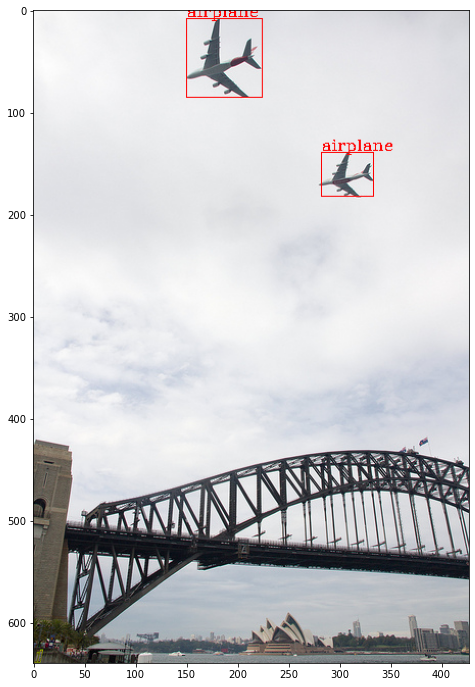

In [70]:
img = cv2.imread('datasets/mini_airplane/images/000000001761.jpg')

plt.figure(figsize = (12.0,12.0))
bboxes = imageid2bbox[imagename2id['000000001761.jpg']]
for det in bboxes:
    bbox = np.array(det[:4]).astype(int)
    cv2.rectangle(img,(bbox[0], bbox[1]),(bbox[0]+bbox[2],bbox[1]+bbox[3]), (0,0,255), 1)
    label_text = str('airplane')
    cv2.putText(img, label_text, (bbox[0], bbox[1]-2), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0,0,255))
im2 = img[:,:,::-1] 
plt.imshow(im2)
plt.show()

### 划分训练集和验证集

In [6]:
np.random.seed(123)
train_image_names = np.random.choice(list(imagename2id.keys()), int(len(imagename2id.keys())*0.8), False)
val_image_names = list(set(imagename2id.keys()) - set(train_image_names))
print('train_image_names length:', len(train_image_names))
print('val_image_names:', len(val_image_names))

train_image_names length: 77
val_image_names: 20


In [7]:
import os 
train_images = []
train_annotations = []
for imgname in train_image_names:
    train_images.append(imagename2imageinfo[imgname])
    image_id = imagename2id[imgname]
    train_annotations.extend(imageid2anno[image_id])
train_instance = {
    'images':train_images,
    'annotations':train_annotations,
    'categories':labels['categories']
}
dirs = r'./temp/mini_airplane/annotations'
if not os.path.exists(dirs):
    os.makedirs(dirs)
with open('temp/mini_airplane/annotations/train.json', 'w') as f:
    json.dump(train_instance,f,indent=2)
val_images = []
val_annotations = []
for imgname in val_image_names:
    val_images.append(imagename2imageinfo[imgname])
    image_id = imagename2id[imgname]
    val_annotations.extend(imageid2anno[image_id])
val_instance = {
    "images": val_images,
    "annotations": val_annotations,
    "categories": labels["categories"]
}
with open("temp/mini_airplane/annotations/val.json", "w") as f:
    json.dump(val_instance, f, indent=2)

In [8]:
print(labels["annotations"][0])

{'segmentation': [[5.8, 198.35, 32.84, 191.59, 117.85, 204.15, 92.73, 175.17, 129.44, 160.68, 185.47, 177.1, 186.44, 173.23, 168.08, 150.05, 200.93, 138.46, 191.27, 121.07, 290.76, 94.99, 297.52, 65.04, 284.0, 61.18, 256.95, 86.29, 1.93, 105.61, 0.0, 195.45]], 'area': 18466.8935, 'iscrowd': 0, 'image_id': 1, 'bbox': [0.0, 61.18, 297.52, 142.97], 'category_id': 1, 'id': 1}


In [9]:
import os
import torch
import torch.utils.data
from PIL import Image
from skimage import io

class AirplaneDetDataset(torch.utils.data.Dataset):
    def __init__(self, root, anno_file, transforms = None):
        self.root = root
        self.transforms = transforms
        self.imgs = []
        with open(os.path.join(root, 'annotations', anno_file), 'r') as f:
            labels = json.load(f)
        self.imagename2id = {}
        self.imageid2anno = {}
        for image in labels['images']:
            self.imgs.append(image['file_name'])
            self.imagename2id[image['file_name']] = image['id']
        for anno in labels['annotations']:
            if anno['image_id'] not in self. imageid2anno:
                self.imageid2anno[anno["image_id"]] = []
            self.imageid2anno[anno['image_id']].append(anno['bbox'])
    def __getitem__(self, idx):
        img_path = os.path.join(self.root, 'images', self.imgs[idx])
        img_path = os.path.abspath(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        #img = io.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR).astype(np.float32)
        img = img/255.0
        img = img.transpose(2,0,1)
        img = torch.tensor(img)
        img_id = self.imagename2id[self.imgs[idx]]
        boxes = []
        for bbox in self.imageid2anno[img_id]:
            xmin = bbox[0]
            ymin = bbox[1]
            xmax = xmin + bbox[2]
            ymax = ymin + bbox[3]
            boxes.append([xmin, ymin, xmax, ymax])
        num_objs = len(self.imageid2anno[img_id])
        boxes = torch.as_tensor(boxes, dtype = torch.float32)
        #飞机标签设为1
        labels = torch.ones((num_objs,), dtype = torch.int64)
        image_id = torch.tensor([idx])
        area = (boxes[:, 3] - boxes[:, 1]) * (boxes[:, 2] - boxes[:, 0])
        iscrowd = torch.zeros((num_objs,), dtype = torch.int64)
        target = {}
        target['boxes'] = boxes
        target['labels'] = labels
        target['image_id'] = image_id
        target["area"] = area
        target["iscrowd"] = iscrowd
        
        if self.transforms is not None:
            img, target = self.transforms(img, target)
        return img, target, self.imgs[idx]
    
    def __len__(self):
        return len(self.imgs)


In [10]:
import shutil
if not os.path.exists('./temp/mini_airplane/images'):
    shutil.copytree('./datasets/mini_airplane/images','./temp/mini_airplane/images')
dataset = AirplaneDetDataset('./temp/mini_airplane', 'train.json')

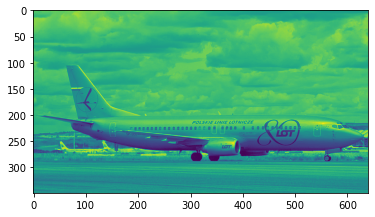

In [11]:
img,target ,e= dataset.__getitem__(5)
imgs = (img[0]+img[1]+img[2])
plt.imshow(imgs)

In [12]:
import torch
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection.faster_rcnn import FasterRCNN
from torchvision.models.detection.rpn import AnchorGenerator

from torch.utils.data import DataLoader,Dataset
from torch.utils.data.sampler import SequentialSampler

def get_object_detection_model(num_classes):
    model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained = True)
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

    return model

In [16]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

model = get_object_detection_model(2).to(device)

In [20]:
model

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [21]:
class Averager:
    def __init__(self):
        self.current_total = 0.0
        self.iterations = 0.0

    def send(self, value):
        self.current_total += value
        self.iterations += 1

    @property
    def value(self):
        if self.iterations == 0:
            return 0
        else:
            return 1.0 * self.current_total / self.iterations

    def reset(self):
        self.current_total = 0.0
        self.iterations = 0.0

In [23]:
def collate_fn(batch):
    return tuple(zip(*batch))

train_dataset = AirplaneDetDataset('temp/mini_airplane', 'train.json')
valid_dataset = AirplaneDetDataset('temp/mini_airplane', 'val.json')

train_data_loader = DataLoader(train_dataset, batch_size=1, shuffle = False, num_workers = 0,collate_fn=collate_fn)
valid_data_loader = DataLoader(valid_dataset, batch_size=1, shuffle = False, num_workers = 0,collate_fn=collate_fn)

In [29]:
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr = 0.0025, momentum = 0.9, weight_decay = 0.0005)
lr_scheduler = None
num_epochs = 8

# resnet50模型过大，内存不足
loss_hist = Averager()
itr = 1

for epoch in range(num_epochs):
    loss_hist.reset()
    for images, targets, _ in train_data_loader:
        images = list(image.to(device) for image in images)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]
        loss_dict = model(images, targets)
        losses = sum(loss for loss in loss_dict.values())
        loss_value = losses.item()
        loss_hist.send(loss_value)
        optimizer.zero_grad()
        losses.backward()
        optimizer.step()
        
        if itr %10 ==0:
            print(f"iteration #{itr} loss:{loss_value}")
        itr+=1
        if itr > 10:
            break
    if lr_scheduler is not None:
        lr_scheduler.step()
    print(f"Epoch #{epoch} loss: {loss_hist.value}")   

iteration #10 loss:0.3071460723876953
Epoch #0 loss: 0.26047331988811495
Epoch #1 loss: 0.166505828499794
Epoch #2 loss: 0.15943099558353424
Epoch #3 loss: 0.14815162122249603
Epoch #4 loss: 0.1836886703968048
Epoch #5 loss: 0.18765069544315338
Epoch #6 loss: 0.1709466129541397
Epoch #7 loss: 0.1683153212070465


In [31]:
model.eval()

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


('000000217060.jpg',)


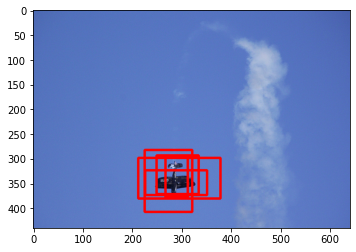

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


('000000477441.jpg',)


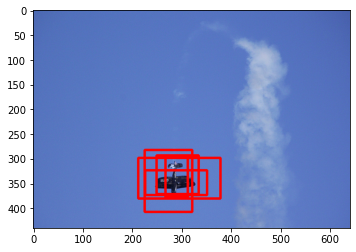

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


('000000442480.jpg',)


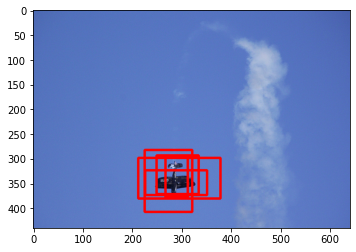

In [45]:
itr = 1
for image, _, imgname in iter(train_data_loader):
    images = list(img.to(device) for img in images)
    sample = images[0].permute(1, 2, 0).cpu().numpy()
    model.eval()
    cpu_device = torch.device('cpu')
    with torch.no_grad():
        outputs = model(images)
        outputs = [{k: v.to(cpu_device) for k, v in t.items()} for t in outputs]
    boxes = outputs[0]['boxes'].data.cpu().numpy()
    scores = outputs[0]['scores'].data.cpu().numpy()
    boxes = boxes[scores >= 0.5].astype(np.int32)
    for box in boxes:
        cv2.rectangle(np.ascontiguousarray(sample),
                     (int(box[0]), int(box[1])),
                     (int(box[2]), int(box[3])),
                     (220, 0, 0), 3)
    print(imgname)
    plt.savefig('./results/'+str(imgname[0][:-3]+str('png')))
    plt.imshow(sample)
    plt.show()
    itr+=1
    if itr>3:
        break

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


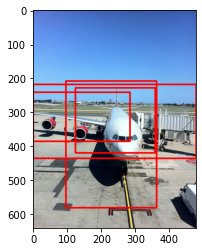

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


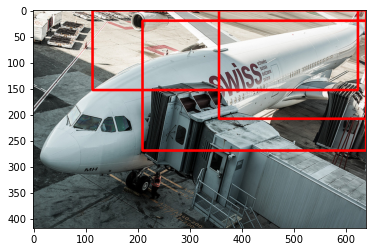

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


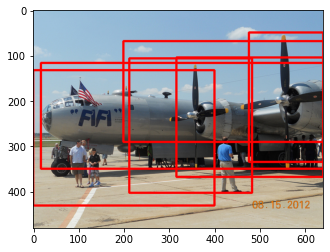

In [46]:
itr = 1
for images, _, imgname in iter(valid_data_loader):
    images = list(img.to(device) for img in images)
    sample = images[0].permute(1,2,0).cpu().numpy()
    cpu_device = torch.device("cpu")
    with torch.no_grad():
        outputs = model(images)
        outputs = [{k: v.to(cpu_device) for k, v in t.items()} for t in outputs]
#     fig, ax = plt.subplots(1, 1, figsize=(16, 8))
    boxes = outputs[0]['boxes'].data.cpu().numpy()
    scores = outputs[0]['scores'].data.cpu().numpy()

    boxes = boxes[scores >= 0.5].astype(np.int32)
    for box in boxes:
        cv2.rectangle(np.ascontiguousarray(sample),
                      (int(box[0]), int(box[1])),
                      (int(box[2]), int(box[3])),
                      (220, 0, 0), 3)
    
    plt.imshow(sample)
    plt.savefig('./temp/'+str(imgname[0]))
    plt.show()
    itr += 1
    if itr>3:
        break;

In [47]:
box

array([212, 106, 483, 402], dtype=int32)

In [48]:
# 首先预测每张验证集的图片，将每张图片的结果保存在字典imgname2bboxes中
imgname2bboxes = dict()
for images, _, imgname in iter(valid_data_loader):
    imgname = imgname[0]
    imgname2bboxes[imgname] = []
    images = list(img.to(device) for img in images)
    sample = images[0].permute(1,2,0).cpu().numpy()
    cpu_device = torch.device("cpu")
    with torch.no_grad():
        outputs = model(images)
        outputs = [{k: v.to(cpu_device) for k, v in t.items()} for t in outputs]
    boxes = outputs[0]['boxes'].data.cpu().numpy()
    scores = outputs[0]['scores'].data.cpu().numpy()

    boxes = boxes[scores >= 0.05].astype(np.int32)
    scores = scores[scores >= 0.05]
    for box, score in zip(boxes, scores):
        imgname2bboxes[imgname].append([box[0], box[1], box[2], box[3], score])
# 将imgname2bboxes字典的内容转换为COCO标准格式并保存下来，用于之后的计算mAP

with open("temp/mini_airplane/annotations/val.json", "r") as f:
    val_labels = json.load(f)
val_images = val_labels["images"]
imagename2id = dict()
for img in val_images:
    imagename2id[img["file_name"]] = img["id"]
val_annotations = []
anno_id = 1
for imgname, bboxes in imgname2bboxes.items():
    for bbox in bboxes:
        box = list([int(bbox[0]), int(bbox[1]), int(bbox[2]) - int(bbox[0]) + 1, int(bbox[3]) - int(bbox[1]) + 1])
        score = float(bbox[-1])
        imgid = imagename2id[imgname]
        val_annotations.append({
            "id": anno_id,
            "bbox": box,
            "score": score,
            "image_id": imagename2id[imgname],
            "category_id": 1
        })
        anno_id += 1

with open("results/val_results.json", "w") as f:
    json.dump(val_annotations, f, indent=2)

In [49]:
! python datasets/src/coco_eval.py results/val_results.json --ann datasets/mini_airplane/annotations/val.json

python: can't open file 'datasets/src/coco_eval.py': [Errno 2] No such file or directory


In [50]:
torch.save(model.state_dict(), 'datasets/models/fasterrcnn_resnet50_fpn.pth')

FileNotFoundError: [Errno 2] No such file or directory: 'datasets/models/fasterrcnn_resnet50_fpn.pth'